In [1]:
# ==============================================================================
# Notebook 5: Apresentação Executiva e Dashboard de Resultados
# ==============================================================================

# --- Importação de bibliotecas essenciais ---
import pandas as pd
import plotly.graph_objects as go
import json
import os
from IPython.display import display, Markdown, Image

# --- Configuração de caminhos ---
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
REPORTS_PATH = os.path.join(ROOT_DIR, 'reports')
REPORTS_V2_PATH = os.path.join(ROOT_DIR, 'reports', 'v2')
PLOTS_V2_PATH = os.path.join(REPORTS_V2_PATH, 'plots')

In [2]:
# ==============================================================================
# SEÇÃO 1: O PROBLEMA DE NEGÓCIO
# ==============================================================================

display(Markdown("# 📊 Apresentação Executiva: Projeto de Previsão de Churn"))

display(Markdown(
    """
Este notebook foi criado para apresentar os resultados do projeto de previsão de Churn para uma audiência gerencial. Nosso foco será em:

* **O problema de negócio** que estamos resolvendo.
* **A solução desenvolvida** e como ela evoluiu.
* **Os resultados-chave** e os principais fatores que levam ao Churn.
* **Recomendações estratégicas** para ações de retenção de clientes.

## 1. O Problema de Negócio: O Churn de Clientes

O Churn, ou a evasão de clientes, é um dos maiores desafios para empresas de telecomunicações. Um cliente que sai não apenas representa uma perda de receita, mas também custa mais para ser substituído do que para ser retido.

Nosso objetivo é ir além de apenas medir a taxa de Churn. Queremos **prever quais clientes estão prestes a sair** e **entender o porquê**, para que possamos agir antes que seja tarde.
"""
))

# 📊 Apresentação Executiva: Projeto de Previsão de Churn


Este notebook foi criado para apresentar os resultados do projeto de previsão de Churn para uma audiência gerencial. Nosso foco será em:

* **O problema de negócio** que estamos resolvendo.
* **A solução desenvolvida** e como ela evoluiu.
* **Os resultados-chave** e os principais fatores que levam ao Churn.
* **Recomendações estratégicas** para ações de retenção de clientes.

## 1. O Problema de Negócio: O Churn de Clientes

O Churn, ou a evasão de clientes, é um dos maiores desafios para empresas de telecomunicações. Um cliente que sai não apenas representa uma perda de receita, mas também custa mais para ser substituído do que para ser retido.

Nosso objetivo é ir além de apenas medir a taxa de Churn. Queremos **prever quais clientes estão prestes a sair** e **entender o porquê**, para que possamos agir antes que seja tarde.


In [3]:
# ==============================================================================
# SEÇÃO 2: A SOLUÇÃO: A EVOLUÇÃO DO MODELO PREDITIVO
# ==============================================================================

display(Markdown(
    """
## 2. A Solução: A Evolução do Modelo Preditivo

Para resolver esse problema, construímos um modelo de Machine Learning que aprende com o histórico dos clientes. Nosso projeto passou por duas fases: uma versão inicial (**V1**) e uma versão otimizada e robusta (**V2**).

A principal diferença do nosso modelo **V2** é que ele foi treinado para ser **muito mais eficaz em identificar os clientes que realmente vão sair**, em vez de apenas ter uma alta precisão geral. Para um problema de Churn, é mais importante encontrar corretamente os clientes em risco do que acertar todas as previsões.
"""
))

# --- Carregar e comparar métricas ---
try:
    # Carregando dados da versão 1
    metrics_v1_df = pd.read_csv(os.path.join(REPORTS_PATH, 'comparacao_modelos_base.csv'))
    metrics_v1_df = metrics_v1_df[metrics_v1_df['Modelo'] == 'Random Forest'].iloc[0]

    # Carregando dados da versão 2
    with open(os.path.join(REPORTS_V2_PATH, 'final_model_metrics_v2.json'), 'r') as f:
        metrics_v2 = json.load(f)

    # Criando DataFrame para o gráfico
    comparison_df = pd.DataFrame({
        'Métrica': ['Precisão', 'Recall', 'F1-Score', 'AUC'],
        'Modelo V1': [
            metrics_v1_df['Precisao'],
            metrics_v1_df['Recall'],
            metrics_v1_df['F1-Score'],
            metrics_v1_df['Acuracia'] # AUC na v1 foi salvo como Acuracia para comparação
        ],
        'Modelo V2': [
            metrics_v2['precision'],
            metrics_v2['recall'],
            metrics_v2['f1-score'],
            metrics_v2['auc_score']
        ]
    })
    
    # Criando o gráfico de barras interativo com Plotly
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=comparison_df['Métrica'],
        y=comparison_df['Modelo V1'],
        name='Modelo V1 (Baseline)',
        marker_color='rgb(26, 118, 255)'
    ))
    fig.add_trace(go.Bar(
        x=comparison_df['Métrica'],
        y=comparison_df['Modelo V2'],
        name='Modelo V2 (Otimizado)',
        marker_color='rgb(55, 83, 109)'
    ))

    fig.update_layout(
        title_text='Comparação de Métricas de Desempenho: Modelo V1 vs. Modelo V2',
        barmode='group',
        xaxis_title="Métrica",
        yaxis_title="Pontuação",
        template="plotly_white",
        annotations=[
            dict(
                x=xi,
                y=yi,
                text=f'{yi:.2f}',
                xanchor='center',
                yanchor='bottom',
                showarrow=False,
            ) for xi, yi in zip(comparison_df['Métrica'], comparison_df['Modelo V1'])
        ] + [
            dict(
                x=xi,
                y=yi,
                text=f'{yi:.2f}',
                xanchor='center',
                yanchor='bottom',
                showarrow=False,
            ) for xi, yi in zip(comparison_df['Métrica'], comparison_df['Modelo V2'])
        ]
    )
    
    # Exibir o gráfico
    fig.show()

    display(Markdown(
        """
**Conclusão:** O **Modelo V2** é a nossa melhor ferramenta para identificar clientes em risco de Churn. As métricas de **Recall** e **F1-Score** - que são as mais importantes para problemas de Churn - melhoraram drasticamente, indicando que estamos **encontrando mais clientes que realmente vão sair (Recall)** e mantendo um bom equilíbrio entre precisão e recall **(F1-Score)**.
"""
    ))

except FileNotFoundError as e:
    display(Markdown(f"❌ **ERRO:** Arquivos de métricas não encontrados. Execute os notebooks anteriores (`02` e `03`) para gerar os arquivos necessários. Erro: `{e}`"))


## 2. A Solução: A Evolução do Modelo Preditivo

Para resolver esse problema, construímos um modelo de Machine Learning que aprende com o histórico dos clientes. Nosso projeto passou por duas fases: uma versão inicial (**V1**) e uma versão otimizada e robusta (**V2**).

A principal diferença do nosso modelo **V2** é que ele foi treinado para ser **muito mais eficaz em identificar os clientes que realmente vão sair**, em vez de apenas ter uma alta precisão geral. Para um problema de Churn, é mais importante encontrar corretamente os clientes em risco do que acertar todas as previsões.



**Conclusão:** O **Modelo V2** é a nossa melhor ferramenta para identificar clientes em risco de Churn. As métricas de **Recall** e **F1-Score** - que são as mais importantes para problemas de Churn - melhoraram drasticamente, indicando que estamos **encontrando mais clientes que realmente vão sair (Recall)** e mantendo um bom equilíbrio entre precisão e recall **(F1-Score)**.



## 3. Principais Fatores de Churn: O Que o Modelo nos Revela?

Um dos maiores benefícios do nosso modelo **V2** é que ele não apenas prevê, mas também **explica as suas previsões**. A análise de interpretabilidade com SHAP nos mostra quais fatores de um cliente mais contribuem para a previsão de Churn.


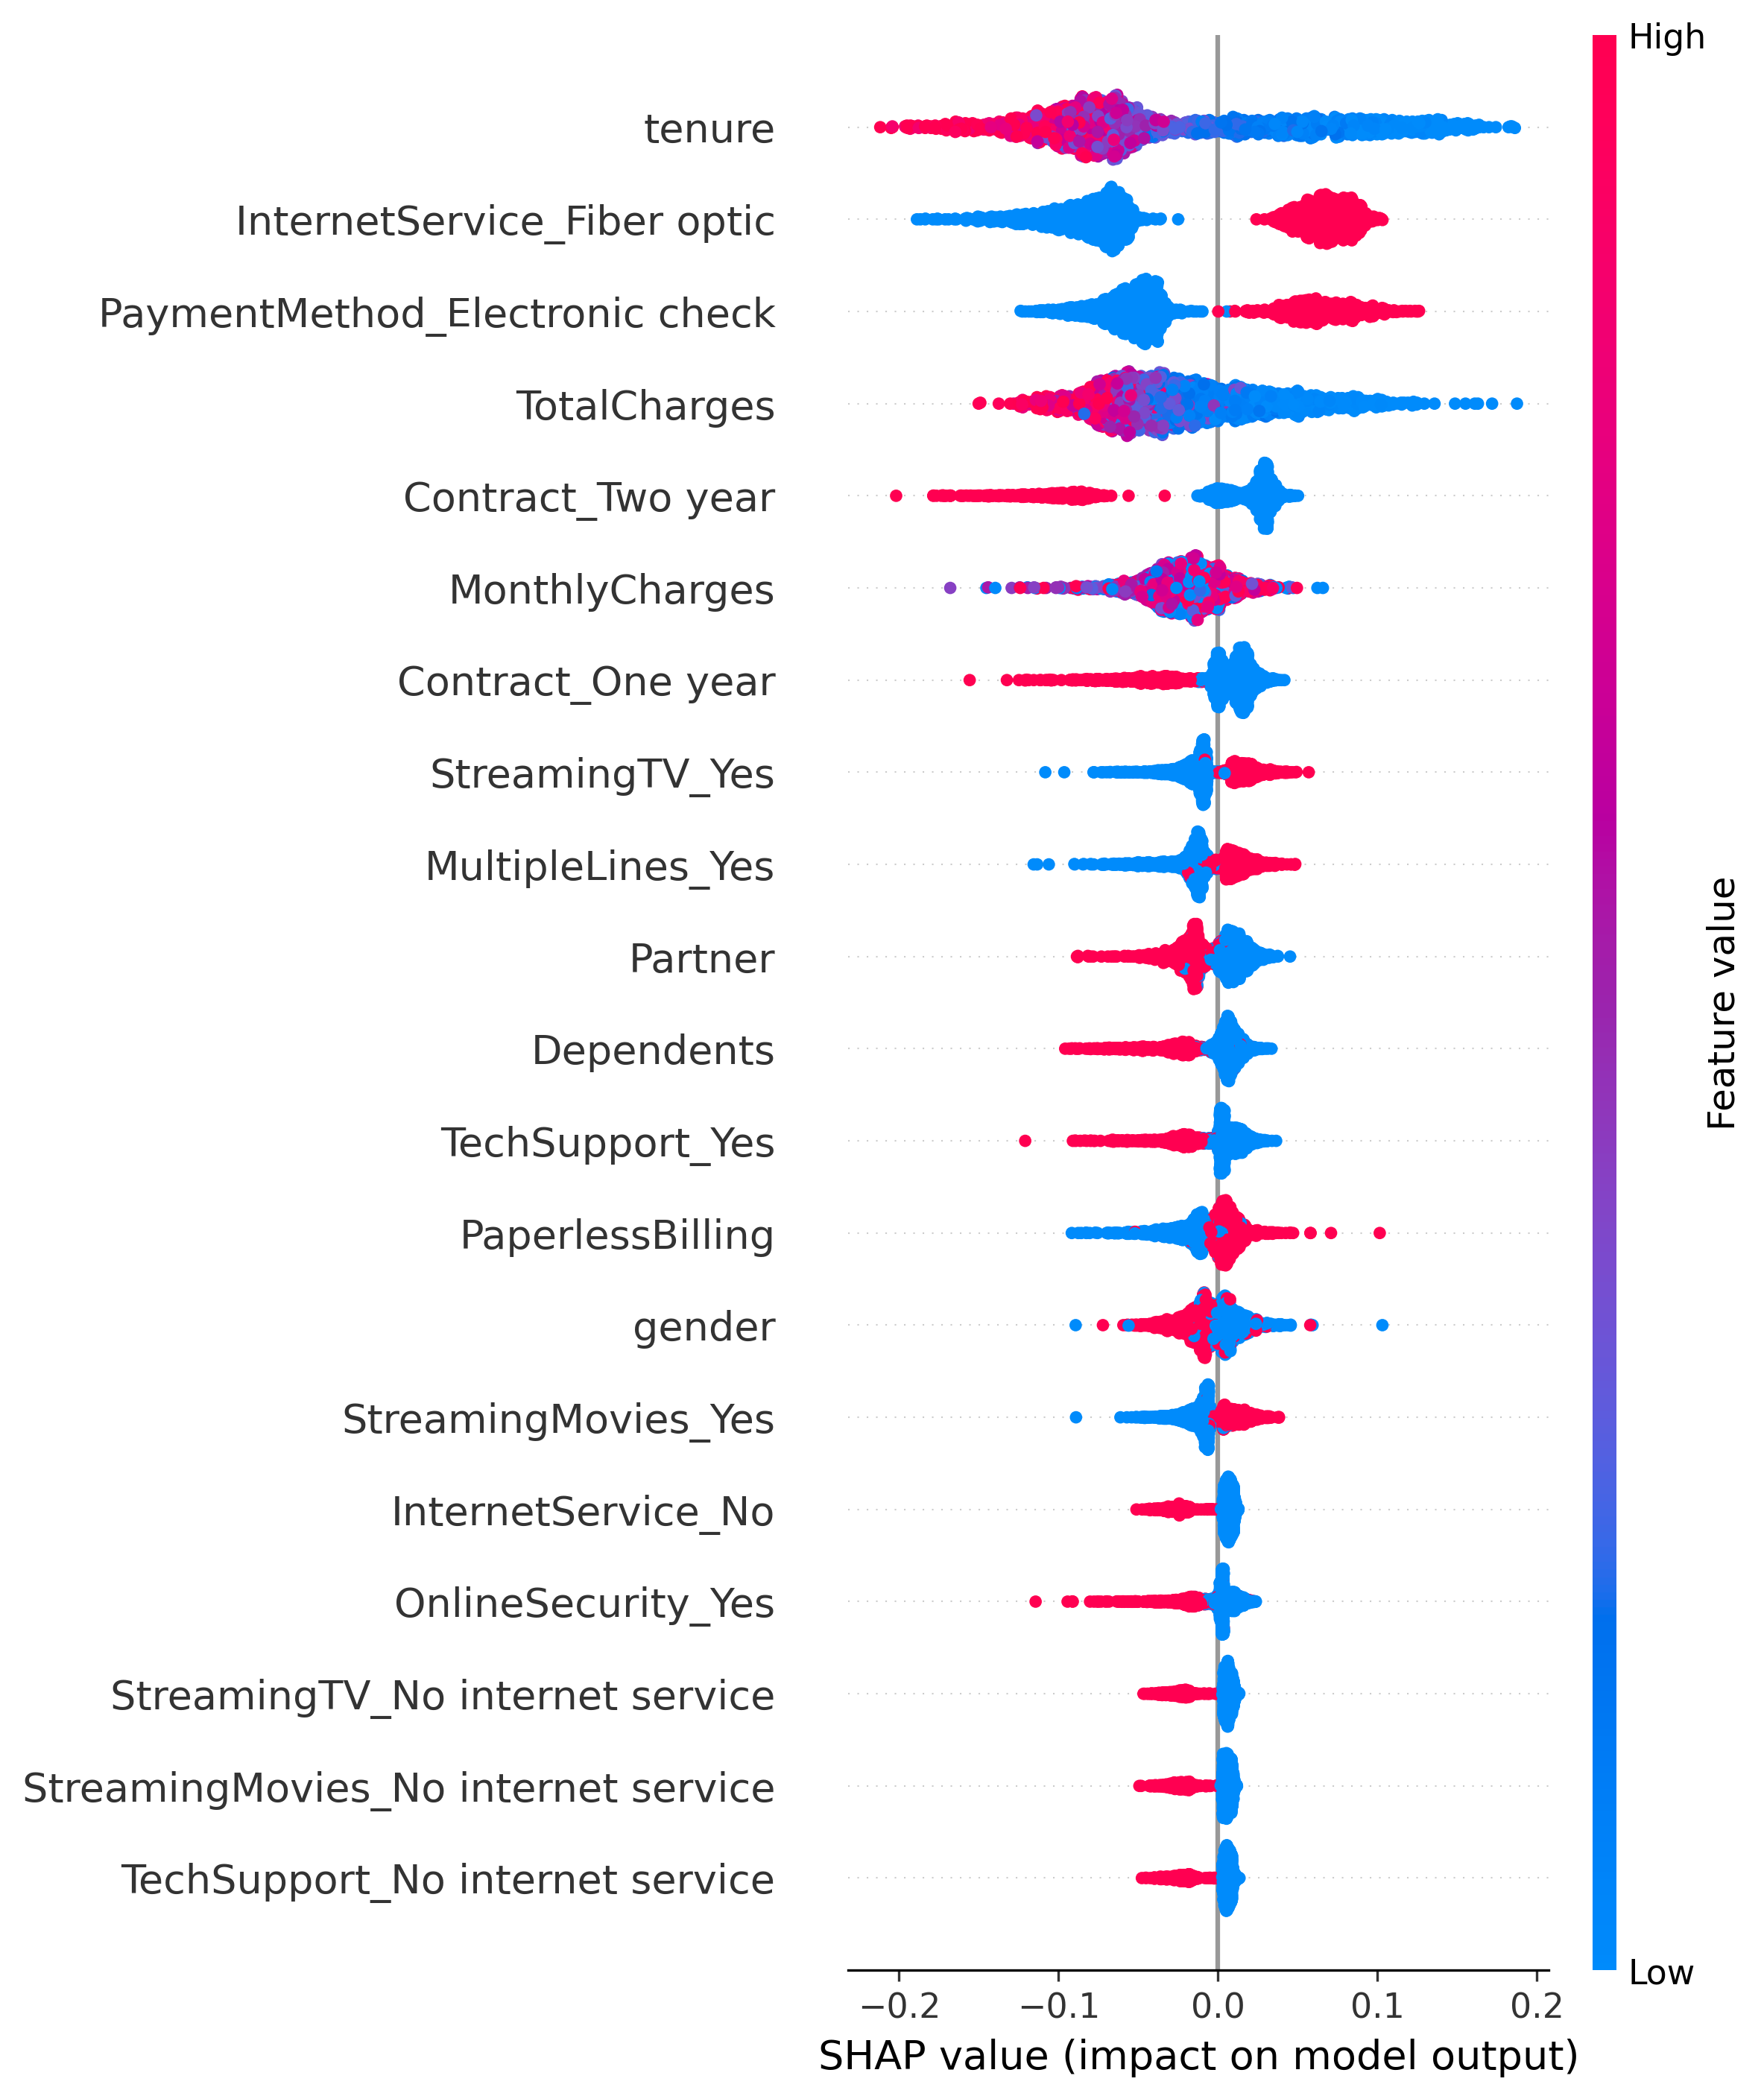


* As barras **vermelhas** indicam fatores que **aumentam a chance de Churn**.
* As barras **azuis** indicam fatores que **diminuem a chance de Churn**.

**Principais Insights de Negócio:**

1.  **Tipo de Contrato:** Clientes com **contratos mensais** (`Month-to-month`) são o fator isolado que mais impulsiona o Churn.
2.  **Tempo de Serviço:** Clientes novos, com **pouco tempo de serviço** (`tenure` baixo), têm uma alta propensão a sair.
3.  **Segurança Online:** A **ausência de um serviço de segurança online** (`OnlineSecurity_No`) é um dos principais indicadores de risco.
4.  **Serviço de Internet:** Clientes com **fibra óptica** (`InternetService_Fiber optic`) têm um risco mais elevado de Churn, o que pode indicar problemas de qualidade ou forte concorrência neste segmento.


In [4]:
# ==============================================================================
# SEÇÃO 3: O PORQUÊ DO CHURN: INSIGHTS DO MODELO
# ==============================================================================

display(Markdown(
    """
## 3. Principais Fatores de Churn: O Que o Modelo nos Revela?

Um dos maiores benefícios do nosso modelo **V2** é que ele não apenas prevê, mas também **explica as suas previsões**. A análise de interpretabilidade com SHAP nos mostra quais fatores de um cliente mais contribuem para a previsão de Churn.
"""
))

try:
    # Exibindo a imagem do gráfico SHAP
    shap_plot_path = os.path.join(PLOTS_V2_PATH, 'shap_summary_plot_v2.png')
    display(Image(filename=shap_plot_path, width=700))

    display(Markdown(
        """
* As barras **vermelhas** indicam fatores que **aumentam a chance de Churn**.
* As barras **azuis** indicam fatores que **diminuem a chance de Churn**.

**Principais Insights de Negócio:**

1.  **Tipo de Contrato:** Clientes com **contratos mensais** (`Month-to-month`) são o fator isolado que mais impulsiona o Churn.
2.  **Tempo de Serviço:** Clientes novos, com **pouco tempo de serviço** (`tenure` baixo), têm uma alta propensão a sair.
3.  **Segurança Online:** A **ausência de um serviço de segurança online** (`OnlineSecurity_No`) é um dos principais indicadores de risco.
4.  **Serviço de Internet:** Clientes com **fibra óptica** (`InternetService_Fiber optic`) têm um risco mais elevado de Churn, o que pode indicar problemas de qualidade ou forte concorrência neste segmento.
"""
    ))
except FileNotFoundError as e:
    display(Markdown(f"❌ **ERRO:** O arquivo de imagem do gráfico SHAP não foi encontrado. Execute o notebook `03` para gerá-lo. Erro: `{e}`"))

In [5]:
# ==============================================================================
# SEÇÃO 4: RECOMENDAÇÕES ESTRATÉGICAS
# ==============================================================================

display(Markdown(
    """
## 4. Recomendações Estratégicas e Próximos Passos

Com base nos insights obtidos, o modelo nos permite fazer as seguintes recomendações para a equipe de negócios, para que a estratégia de Churn se torne proativa:

* **Ação 1: Foco em Contratos Mensais**
    * **Recomendação:** Criar campanhas de marketing ou ofertas exclusivas para incentivar clientes de contrato mensal a migrarem para planos de fidelidade de 1 ou 2 anos.
    * **Impacto Esperado:** Redução do risco de Churn e aumento do Lifetime Value do cliente.

* **Ação 2: Monitoramento de Clientes Novos**
    * **Recomendação:** Implementar um programa de acompanhamento proativo nos primeiros meses de serviço, com contato da equipe de suporte e ofertas de benefícios adicionais.
    * **Impacto Esperado:** Fortalecimento do relacionamento com o cliente e redução da evasão inicial.

* **Ação 3: Ofertas de Segurança**
    * **Recomendação:** Promover ativamente a contratação de serviços de segurança online para clientes que não os possuem, destacando os benefícios e a proteção.
    * **Impacto Esperado:** Adicionar valor ao serviço e diminuir o risco de Churn.

## 5. Conclusão

O projeto de previsão de Churn está completo e robusto. O modelo **V2** otimizado nos dá a capacidade de **prever a evasão com maior precisão** e, o mais importante, nos fornece **informações claras e acionáveis** sobre o porquê.

Esta ferramenta pode se tornar um ativo estratégico para a empresa, permitindo a transição de uma estratégia de reação para uma estratégia de **prevenção de Churn**, com um impacto direto na receita e na satisfação do cliente.
"""
))




## 4. Recomendações Estratégicas e Próximos Passos

Com base nos insights obtidos, o modelo nos permite fazer as seguintes recomendações para a equipe de negócios, para que a estratégia de Churn se torne proativa:

* **Ação 1: Foco em Contratos Mensais**
    * **Recomendação:** Criar campanhas de marketing ou ofertas exclusivas para incentivar clientes de contrato mensal a migrarem para planos de fidelidade de 1 ou 2 anos.
    * **Impacto Esperado:** Redução do risco de Churn e aumento do Lifetime Value do cliente.

* **Ação 2: Monitoramento de Clientes Novos**
    * **Recomendação:** Implementar um programa de acompanhamento proativo nos primeiros meses de serviço, com contato da equipe de suporte e ofertas de benefícios adicionais.
    * **Impacto Esperado:** Fortalecimento do relacionamento com o cliente e redução da evasão inicial.

* **Ação 3: Ofertas de Segurança**
    * **Recomendação:** Promover ativamente a contratação de serviços de segurança online para clientes que não os possuem, destacando os benefícios e a proteção.
    * **Impacto Esperado:** Adicionar valor ao serviço e diminuir o risco de Churn.

## 5. Conclusão

O projeto de previsão de Churn está completo e robusto. O modelo **V2** otimizado nos dá a capacidade de **prever a evasão com maior precisão** e, o mais importante, nos fornece **informações claras e acionáveis** sobre o porquê.

Esta ferramenta pode se tornar um ativo estratégico para a empresa, permitindo a transição de uma estratégia de reação para uma estratégia de **prevenção de Churn**, com um impacto direto na receita e na satisfação do cliente.
